In [1]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [3]:
# Load data 
with open('SampleInput.txt') as f:
    file = f.readlines()

In [4]:
#Preprocessing data
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
all_rows = []
for line in file:
    if 'DTG' in line:
        line_after_removing_new_line_character = line.replace('\n','')
        columns.append(line_after_removing_new_line_character)
        
    elif len(line.split(" "))>5:
        list_of_values = [value for value in line.split(" ") if value not in ['',0,'\n']]

        #Processing date using first 6 values of row i.e 'Year','Day','Hour','Minutes','Seconds','Milliseconds'
        unprocessed_date_string = str(list_of_values[1]) + " " +  str(list_of_values[0]) + " " +  str(list_of_values[2]) + " " +  str(list_of_values[3]) + " " +  str(list_of_values[4]) + " " +  str(list_of_values[5])
        processed_date_object = datetime.strptime(unprocessed_date_string, "%j %Y %H %M %S %f")
        processed_date_str = processed_date_object.strftime("%Y-%m-%d %H %M %S %f")
        pandas_datetime_object = pd.to_datetime(processed_date_str, format="%Y-%m-%d %H %M %S %f")
        
        list_of_values_after_processing_date = list_of_values[6:]
        total_number_of_parameters = len(list_of_values_after_processing_date)
        
        #Add date as first column
        list_of_values_after_processing_date.insert(0, pandas_datetime_object)
        
        index_of_first_digital_value_in_list = 14
        
        
        # Converting digital values from strings to 1 or 0
        for digital_value_index in range(index_of_first_digital_value_in_list, total_number_of_parameters+1):            
            if list_of_values_after_processing_date[digital_value_index] in ['SYNC','ON','ENA','HIGH','USBL']:
                list_of_values_after_processing_date[digital_value_index] = 1
            else:
                list_of_values_after_processing_date[digital_value_index] = 0
                
        #Convert all values except first column (Date) to float (Decimal)
        for index in range(1, total_number_of_parameters+1):
            list_of_values_after_processing_date[index] = float(list_of_values_after_processing_date[index]) 
        
        all_rows.append(list_of_values_after_processing_date)

# Preprocess column headers
if 'Date' not in columns:
    columns.insert(6,'Date')
if 'Year' in columns:
    columns = columns[6:]

        

In [5]:
#Create the dataframe
df = pd.DataFrame()    
for column_index in range(len(columns)):
    col_data = []
    for i in all_rows:        
        col_data.append(i[column_index])
    df[columns[column_index]] = col_data
    
#Set date as index for dataframe
df.set_index('Date', inplace=True)
original_df = df.copy()

In [6]:
# Display the df (Optional)
display(df)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,22.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00695,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,23.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,26.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,29.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,4.0,-0.0469,-0.0385,0.00542,0.01121,0.1294,-0.0687,0.00690,0.00769,38.0,...,52.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,22.0,-0.0469,-0.0385,0.00577,0.01131,-0.0981,-0.0687,0.00646,0.00799,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,26.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00651,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [7]:
# Normalization


# Min-max 
for column in df:    
    #Only normalize if non digital value
    if df[column].max() != 1 and df[column].min() != 0:
        df[column] = df[column]  / df[column].abs().max()    
        
display(df)


,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,0.758621,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.544671,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,0.793103,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,0.896552,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,1.000000,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,0.137931,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.758621,-0.004392,-0.005299,0.459395,0.645548,-0.010373,-0.009036,0.506270,0.545765,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,0.793103,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,0.896552,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [8]:
for column in df.columns:
    #Fill all Nan with 0
    df[column] = df[column].fillna(0)
    
display(df)

,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-15 17:39:55.043,0.758621,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.544671,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:55.555,0.793103,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:57.091,0.896552,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:39:58.627,1.000000,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-04-15 17:40:02.211,0.137931,-0.004392,-0.005299,0.431529,0.639840,0.013683,-0.009036,0.540752,0.525273,0.974359,...,0.981132,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 12:39:42.526,0.758621,-0.004392,-0.005299,0.459395,0.645548,-0.010373,-0.009036,0.506270,0.545765,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:43.038,0.793103,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-18 12:39:44.574,0.896552,-0.004392,-0.005299,0.463376,0.645548,-0.010373,-0.009036,0.510188,0.549180,0.948718,...,0.962264,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [9]:

df_510 = original_df.loc[pd.to_datetime('2018-05-10'):pd.to_datetime('2018-05-11')]

for column in df_510.columns:
    df_510[column] = df_510[column].replace(np.nan, 0)
    
display(df_510)


/tmp/ipykernel_187187/817112656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_510[column] = df_510[column].replace(np.nan, 0)


,unknown,DTG-1_PCH_ANALOG_RAT (Analog),DTG-1_ROL_ANALOG_RAT (Analog),DTG-1_PCH_FINE_RATE (Analog),DTG-1_ROL_FINE_RATE (Analog),DTG-2_YAW_ANALOG_RAT (Analog),DTG-2_PCH_ANALOG_RAT (Analog),DTG-2_YAW_FINE_RATE (Analog),DTG-2_PCH_FINE_RATE (Analog),DTG-1_TH_TEMP (Analog),...,DTG-2_ELECTRONICS_TH (Analog),DTG-2_SYNC_STS (Digital),DTG-2_ON_STS (Digital),DTG-1_ON_STS (Digital),DTG-2_RB_SUPPLY_STS (Digital),DTG-1_SYNC_STS (Digital),DTG-3_USBL_STS (Digital),DTG_ANALOG_RATE_CHK (Digital),DTG-2_TEMP_SEL_CMD_S (Digital),DTG-1_RB_SUPPLY_STS (Digital)
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-10 00:00:02.198,14.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00666,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 00:00:03.734,17.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00666,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 00:00:05.270,20.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00666,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 00:00:06.294,22.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00666,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 00:00:06.806,23.0,-0.0469,-0.0385,0.00582,0.01131,-0.0981,-0.0687,0.00666,0.00804,37.0,...,51.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-10 23:58:20.171,20.0,-0.0469,-0.0385,0.00531,0.01106,-0.0981,-0.0687,0.00617,0.00759,36.0,...,49.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 23:58:21.195,22.0,-0.0469,-0.0385,0.00531,0.01106,-0.0981,-0.0687,0.00617,0.00759,36.0,...,49.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
2018-05-10 23:58:21.707,23.0,-0.0469,-0.0385,0.00526,0.01111,-0.0981,-0.0687,0.00617,0.00750,36.0,...,49.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


First anomaly detected at 2018-05-10 04:00:00


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

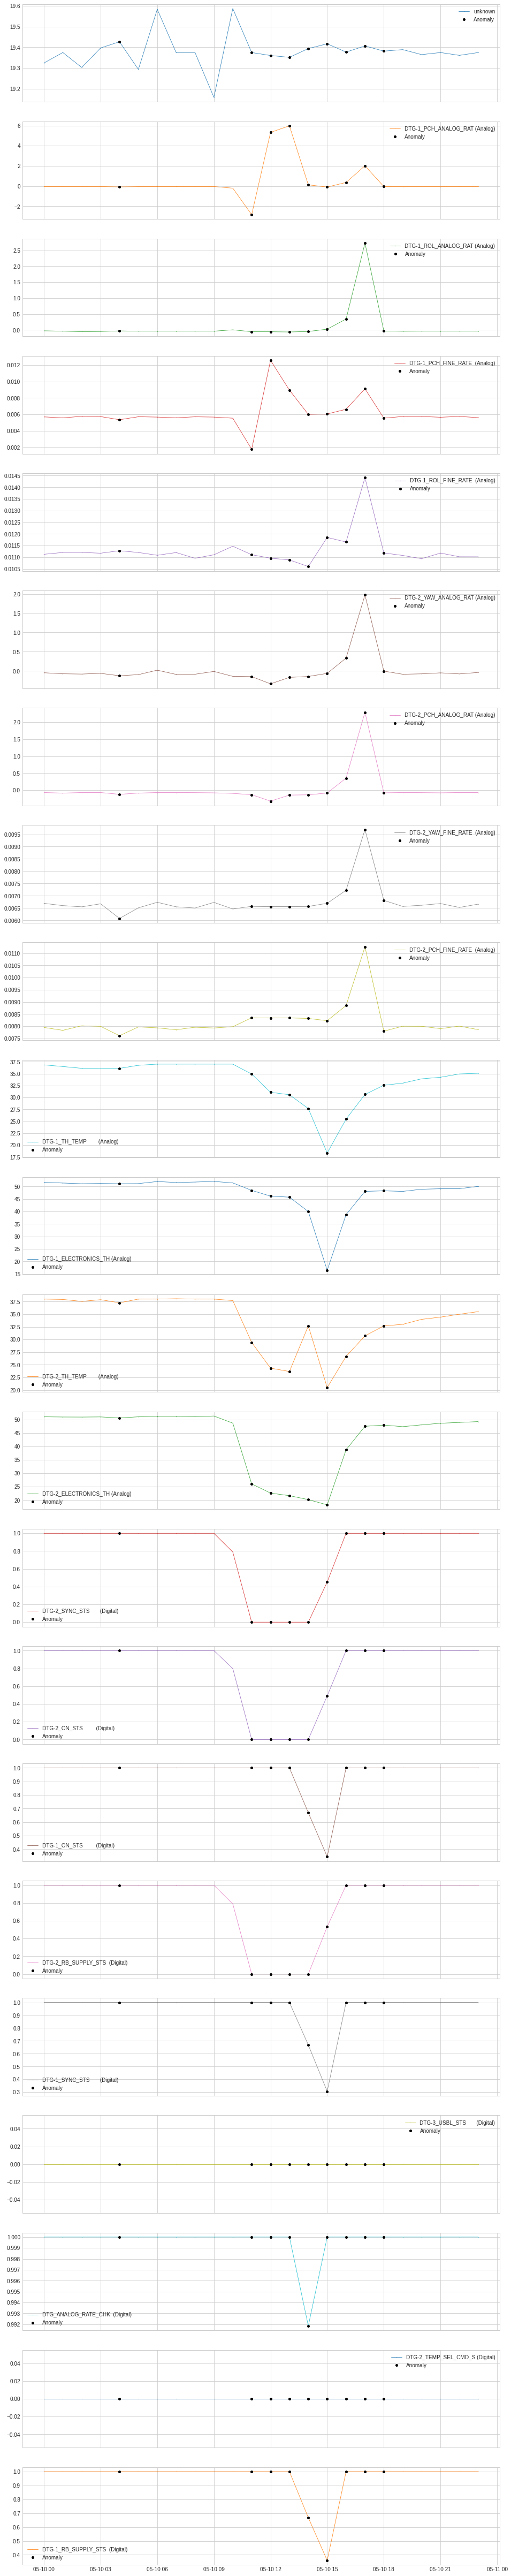

In [10]:

from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD

df_510_r = df_510
df_510_r = df_510.resample('H').mean()
df_510_r.fillna(0)
def myDetectionFunc1(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_510_r)
print('First anomaly detected at',anomalies1[anomalies1].index[0])
plot(df_510_r,legend=True, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

